Ah okay! So this week I decided to learn much more about Audio Classification. It started off with just enthusiasm and after following through, I have learned so much! Have a look at this journey!

<i>So I want you to know that I used the Urban Sound Classification dataset which you can find just by googling it or downlowding it from kaggle or Analytics Vidya (Kaggle is quicker). <b>Find the links in the references at the end!</b></i>

In [30]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
# import keras
# from keras.utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from keras.optimizers import Adam
# from keras.utils import np_utils
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
# from ann_visualizer.visualize import ann_viz
import sklearn

So the first thing we do is read in the data file (train.csv) using a well known Python Library Pandas

In [3]:
audio_dataframe=pd.read_csv('train.csv')
audio_dataframe.head()

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark


I used the below code to read in a sample audio file so that we can have a look at what we are working with

In [4]:
file='Train/{}.wav'.format(audio_dataframe['ID'][15])

<b><i>Librosa</i></b> is an amazing library that has a wide variety of functions to <b>work with audio data</b>

In [5]:
data, sampling_rate=librosa.load(file)

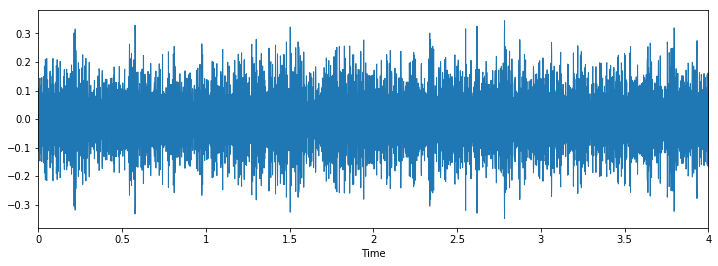

In [6]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

Now the data above does look quite overwhelming since all the data is so dense. So this is how it may look when we take a closer look at the data

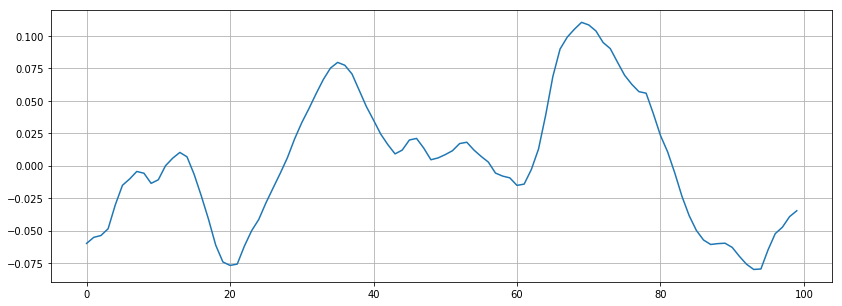

In [7]:
n0=9000
n1=9100

plt.figure(figsize=(14,5))

plt.plot(data[n0:n1])
plt.grid()

Okay so one of my phases in my Artifical Intelligence Project approach is to do a lot of research. Now I stumped across a medium article that taught me that every audio signal consists of many different features. Below are a few of them, have a look! Also the reason why I love Librosa so much is that this one library can calculate all of these features!!!!

The first is <b>Zero Crossing</b>: <i>which is known as the <b>rate</b> at which the signal(wave) <b>changes from positive to negative or negative to positive.</b></i> 
<hr>
So I calculate these features on the sample piece of data loaded above!

In [8]:
zero_crossings=librosa.zero_crossings(data, pad=False)
print(sum(zero_crossings))

3662


The second is <b>Spectral Centroid: </b> Think of it like this, a blues song will have a consistent frequency throughout its length whereas a metal song will have more frequencies toward the end... Therefore, this feature indicates where the 'centre of mass' for a sound is located and is calculated as the weighted mean of the frequencies present in the sound!

In [9]:
spectral_centroids=librosa.feature.spectral_centroid(data, sr=sampling_rate)[0]
spectral_centroids.shape

(173,)

In [10]:
#Computing time variable for visualization
frames=range(len(spectral_centroids))
t=librosa.frames_to_time(frames)

In [11]:
spectral_centroids

array([1027.81108375,  961.28974534,  894.40769891,  992.10721761,
        971.28654174,  920.72299335,  991.69261379,  994.70668345,
        893.90077757,  761.60828674,  811.76210708,  858.13938418,
        929.22416963, 1040.81605947, 1070.59023332, 1020.08623859,
       1037.35462877, 1090.55972241, 1114.86219521,  953.96465365,
        920.04303187,  919.87828649,  947.58421817,  897.21548137,
        865.16265431,  874.57300636,  945.32493647,  957.32601626,
       1000.88165571, 1034.79043344, 1010.7486196 ,  977.12279075,
       1021.11406447, 1051.32306106, 1006.13867869,  913.4930669 ,
        982.54985721, 1046.47558778, 1060.98367276, 1030.16648739,
       1024.34617324,  980.57178714,  950.69552558, 1057.51150982,
        972.55977878,  843.22030418,  897.94360706,  896.60185438,
        979.06174307,  967.07371804,  932.05306756,  905.13378176,
        887.86498293,  951.7547861 ,  969.32016713,  897.05390391,
        894.45494589,  892.68750655,  932.25297242,  991.78385

In [12]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Why normalize? Well if you try to view the spectral centroids, the values are pretty big. So to 'bring these values down to scale'... Try displaying it without scaling the spectral centroids and see for yourself!

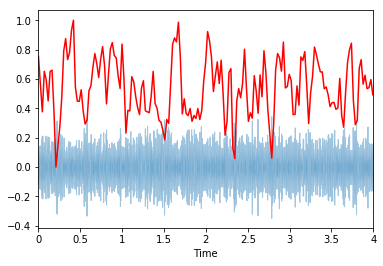

In [13]:
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

The next is <b>Spectral Rolloff: </b> This is a measure of the shape of the signal... It represents the frequency below which a specified percentage of the total spectral energy lies, eg 85%

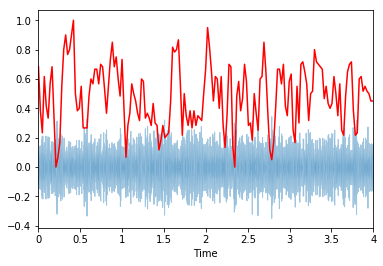

In [14]:
spec_rolloff=librosa.feature.spectral_rolloff(data+0.01, sr=sampling_rate)[0]
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spec_rolloff), color='r')

I have just realized that the Spectral Centroid and Spectral Rolloff look quite similar(not entirely)... I assume that since they are both examples of Fourier Transformations and that they are both scaled, that they do look similar

Now we move on to <b>Mel Frequence Cepstral Coefficient(MFCC): </b>When created for a signal, MFCC's represent a small set of features (about 10-20) which concisely describe the overall shape of the spectral envelope. Basically, this attempts to model the characteristics of the human voice!

In [15]:
mfccs=librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)

(20, 173)


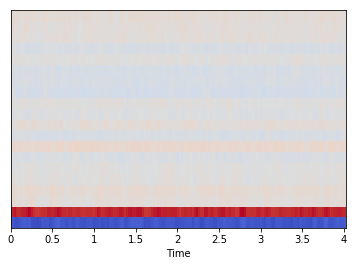

In [16]:
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

[-1.94752796e+02  1.76955996e+02 -5.53244862e-01  3.72090695e+00
 -5.14900243e+00 -6.11348900e+00 -1.28311125e+01  9.55808403e+00
 -1.49163159e+01  1.82060988e-01 -1.02590323e+01 -5.44104443e+00
 -2.13802977e+01 -1.67837875e+01 -1.68033884e+01 -5.30139837e+00
 -1.51794963e+01 -1.79086787e+00 -1.70961844e+00  1.49958408e+00]
[17.40536246 21.21497503 16.47292219 10.93193497 13.79328485  9.84666503
 10.36539338  8.01590795  8.95906     8.87297591 10.03749008 10.06247894
 11.05054983  7.75731016  8.83107069  8.1012224  10.04896006  8.42814012
  8.06713464  9.31834315]


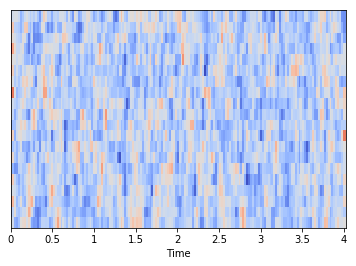

In [17]:
mfcc_scaled=sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

librosa.display.specshow(mfcc_scaled, sr=sampling_rate, x_axis='time')

Wow wait why the big difference after scaling? Well it seems that many values that have independent scales overlap and make it quite difficult to interpret! As you can see, the same features before and after being scaled and we usually do this by ensuring that the coefficient dimensions are Standardized (zero mean and unit variance). 

<h2>Before we talk about the next feature, let us understand some fancy words: </h2>
<hr>
<b>Semitone:</b>This is the smallest musical interval commonly used in Western Tonal Music, and is considered the most dissonant(lacking harmony) when sounded harmonically
<hr>
This brings us to the final one, which is <b>Chroma Frequencies: </b>These are a interesting and powerful representation for music/audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones of the musical octave.

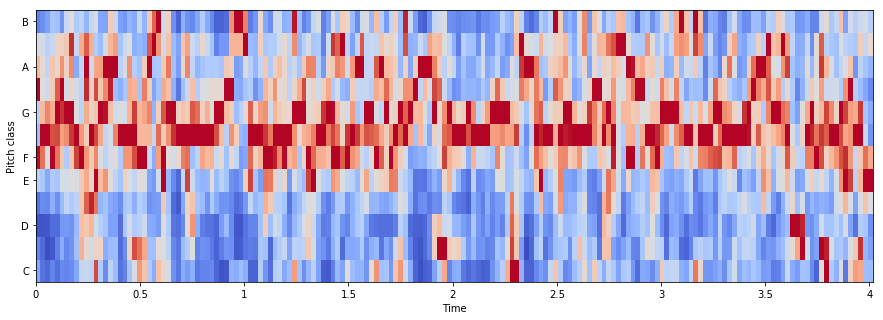

In [18]:
hop_length=512
chromagram=librosa.feature.chroma_stft(data, sr=sampling_rate, hop_length=hop_length)
plt.figure(figsize=(15,5))
librosa.display.specshow(chromagram, x_axis='time',y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [19]:
chromagram.shape

(12, 173)

Okay so now let us see how our classes may be distributed... <i><b>Note: </b>The "normalize=True" argument tells pandas to return what percentage of the entire dataset belongs to a specific class</i>

In [20]:
audio_dataframe.Class.value_counts(normalize=True)

jackhammer          0.122907
engine_idling       0.114811
siren               0.111684
children_playing    0.110396
dog_bark            0.110396
street_music        0.110396
drilling            0.110396
air_conditioner     0.110396
car_horn            0.056302
gun_shot            0.042318
Name: Class, dtype: float64

Below is a custom made method that takes in a dataframe and since the filenames are associated with the ID colun, I have appended it to the path so that <b>librosa knows where to find the files</b>. I then use <b>librosa</b> to load in files and find the MFCC feature!
<hr>
<h4>Why did I choose the MFCC feature?</h4>

<i>Well initially when I started to look at tutorials you tend to find many which use MFCC's are features for their Signal Processing tasks. They are the most popular of features and provide important aspects about the signal that can enable efficient learning for the neural network!</i>

<h5>P.S. Running this method may take a few minutes, so be patient!</h5>

In [21]:
def load_and_extract_features(dataframe):
    filenames=['Train/{}.wav'.format(x) for x in dataframe.ID]
    
    mfccs=[]
    X=[]
    sampling_rates=[]
    
    for x in filenames:
        x, sample_rate = librosa.load(x, res_type='kaiser_fast')
        mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate,n_mfcc=40).T, axis=0)
        X.append(x)
        sampling_rates.append(sample_rate)
        mfccs.append(mfcc)
    
    feature=mfccs
    label=dataframe.Class
    return [feature, label]

The next few steps load in the data and prepare it for the basic neural network

In [22]:
features, labels=load_and_extract_features(audio_dataframe)

In [23]:
len(features)

5435

In [31]:
X=np.array(features)
y=np.array(labels)

We one-hot encode our labels(outputs) and we get 10 classes. This way the keras Neural Network can generate percentage probabilities of each class

When I first started coding and I came to a point where I wanted to take string labels and convert them to one_hot_encoded values, these were the steps that I would follow:<br>
<i><b>encoder=LabelEncoder()<br>
one_hot_encoder=OneHotEncoder()<br>
y=one_hot_encoder.fit_transform(np.reshape(encoder.fit_transform(y), newshape=(-1,1)))</b></i><br>
<br>
However as you can see, this is quite inefficient and I soon discovered that the LabelBinarizer does this for you in a single step... Have a look below

In [35]:
one_step_encoder=LabelBinarizer()
y_binary=one_step_encoder.fit_transform(y)

In [36]:
y.shape

(5435,)

In [37]:
y_binary.shape

(5435, 10)

In [38]:
x_train, x_val, y_train, y_val=train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
x_train.shape

(4348, 40)

We then use Keras to create a simple Neural Network

In [1]:
num_labels = y.shape[1]
filter_size = 2

# build model
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

NameError: name 'y' is not defined

After successfully creating and compiling the model, we fit the model and store the results in the history variable

In [39]:
history=model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

Train on 4348 samples, validate on 1087 samples
Epoch 1/50
4348/4348 [==============================] - 0s 100us/step - loss: 1.8219 - acc: 0.3949 - val_loss: 1.6471 - val_acc: 0.4637
Epoch 2/50
4348/4348 [==============================] - 0s 97us/step - loss: 1.7115 - acc: 0.4213 - val_loss: 1.4951 - val_acc: 0.5327
Epoch 3/50
4348/4348 [==============================] - 0s 107us/step - loss: 1.5895 - acc: 0.4634 - val_loss: 1.3479 - val_acc: 0.5713
Epoch 4/50
4348/4348 [==============================] - 0s 100us/step - loss: 1.5153 - acc: 0.4828 - val_loss: 1.2611 - val_acc: 0.6173
Epoch 5/50
4348/4348 [==============================] - 0s 110us/step - loss: 1.4127 - acc: 0.5200 - val_loss: 1.1838 - val_acc: 0.6440
Epoch 6/50
4348/4348 [==============================] - 0s 100us/step - loss: 1.3433 - acc: 0.5453 - val_loss: 1.1249 - val_acc: 0.6808
Epoch 7/50
4348/4348 [==============================] - 0s 100us/step - loss: 1.2835 - acc: 0.5598 - val_loss: 1.0494 - val_acc: 0.6854
E

So I just realized that the way in which I chose to split the classes may have not been the efficient approach, we should Split it into strata and get an efficient split of data

Once the model is done training, we then take values that are stored in the history variable to plot a graph which can visually present the training process with the training set and validation set

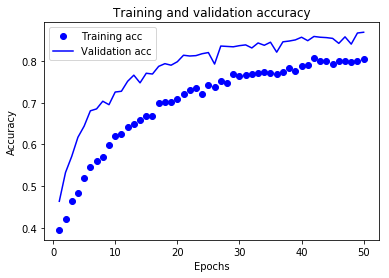

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

It is always a good practice to save your model once you are done. Why? Well it does help save time by saving the optimal weights instead of having you retrain a model from scratch

In [44]:
model.save('rough_mode.h5')

Now I like analyzing the model by getting a list of predictions and generating a precision/recall confusion matrix, using sklearns classification_report method. See steps below

In [45]:
train_predictions=model.predict(x_train)

As you can see I created a <i>'reverse_encode'</i> method which takes in a set of one-hot-encoded values and converts them back into single numbers(0-9) and then back to their string equivalents. I do this for better interpretability of the confusion matrix since the actual string-labels may be easier to understand as compared to the number-labels

In [3]:
def reverse_encode(one_hot_values):
    label_values=[np.argmax(x) for x in one_hot_values]
    label_string_values=encoder.inverse_transform(label_values)    
    return label_string_values

In [4]:
y_inverse, predictions_inverse= reverse_encode(y_train),reverse_encode(train_predictions)

NameError: name 'y_train' is not defined

In [81]:
train_classification_report=metrics.classification_report(y_inverse, predictions_inverse)
print(train_classification_report)

                  precision    recall  f1-score   support

 air_conditioner       0.94      0.98      0.96       449
        car_horn       0.97      1.00      0.98       250
children_playing       0.93      0.71      0.80       651
        dog_bark       0.82      0.87      0.84       453
        drilling       0.94      0.98      0.96       449
   engine_idling       0.98      0.96      0.97       505
        gun_shot       0.73      0.93      0.82       148
      jackhammer       0.99      0.97      0.98       536
           siren       0.94      0.98      0.96       475
    street_music       0.79      0.88      0.83       432

       micro avg       0.91      0.91      0.91      4348
       macro avg       0.90      0.92      0.91      4348
    weighted avg       0.92      0.91      0.91      4348



Now we generate a confusion matrix on our test set to see how general our model is(how well it classifies unseen data)

In [82]:
test_predictions=model.predict(x_val)
test_preds, test_labels=reverse_encode(test_predictions, y_val)

In [83]:
test_predictions.shape

(1087, 10)

In [84]:
test_labels.shape

(1087,)

In [85]:
test_preds.shape

(1087,)

In [86]:
test_classification_report = metrics.classification_report(test_labels, test_preds)
print(test_classification_report)

                  precision    recall  f1-score   support

 air_conditioner       0.96      0.95      0.95       133
        car_horn       0.93      0.83      0.88        48
children_playing       0.61      0.92      0.73       107
        dog_bark       0.81      0.73      0.77       117
        drilling       0.91      0.88      0.90       133
   engine_idling       0.92      0.95      0.93       130
        gun_shot       0.94      0.82      0.88        40
      jackhammer       0.94      0.94      0.94       145
           siren       0.95      0.88      0.92       112
    street_music       0.86      0.71      0.78       122

       micro avg       0.87      0.87      0.87      1087
       macro avg       0.88      0.86      0.87      1087
    weighted avg       0.88      0.87      0.87      1087



I'm curious though... How well would a normal RandomForestClassifier have performed on this dataset... Let us have a look

In [87]:
rough_forest=RandomForestClassifier()
rough_forest.fit(x_train, y_inverse)

/home/god/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
print('Train score:', rough_forest.score(x_train, y_inverse))

Train score: 0.9981600735970562


In [89]:
train_preds=rough_forest.predict(x_train)

In [90]:
forest_train_class_report=metrics.classification_report(y_inverse, train_preds)
print(forest_train_class_report)

                  precision    recall  f1-score   support

 air_conditioner       0.99      1.00      1.00       449
        car_horn       1.00      1.00      1.00       250
children_playing       0.99      1.00      1.00       651
        dog_bark       1.00      1.00      1.00       453
        drilling       1.00      1.00      1.00       449
   engine_idling       1.00      1.00      1.00       505
        gun_shot       1.00      0.99      1.00       148
      jackhammer       1.00      1.00      1.00       536
           siren       1.00      1.00      1.00       475
    street_music       1.00      0.99      0.99       432

       micro avg       1.00      1.00      1.00      4348
       macro avg       1.00      1.00      1.00      4348
    weighted avg       1.00      1.00      1.00      4348



Geez almost perfect scores on the training set... How about the test set?

In [91]:
test_labels.shape

(1087,)

In [92]:
forest_test_preds=rough_forest.predict(x_val)
forest_test_class_report=metrics.classification_report(test_labels, forest_test_preds)

In [93]:
print(forest_test_class_report)

                  precision    recall  f1-score   support

 air_conditioner       0.91      0.93      0.92       133
        car_horn       0.93      0.77      0.84        48
children_playing       0.47      0.84      0.60       107
        dog_bark       0.81      0.68      0.74       117
        drilling       0.86      0.81      0.84       133
   engine_idling       0.92      0.92      0.92       130
        gun_shot       0.94      0.85      0.89        40
      jackhammer       0.91      0.92      0.92       145
           siren       0.95      0.84      0.89       112
    street_music       0.73      0.50      0.60       122

       micro avg       0.81      0.81      0.81      1087
       macro avg       0.84      0.81      0.82      1087
    weighted avg       0.84      0.81      0.82      1087



Ahhh we can see that our Vanilla-RandomForest(default hyperparameters), has overfitted with some of the classes but does pretty well with other classes...

Over the past few months, I have always wondered if there was a tool that would visualize our neural network and I have come across the one below! Try it out!

In [95]:
ann_viz(model, title='Test')

My first attempt at displaying a spectrometer

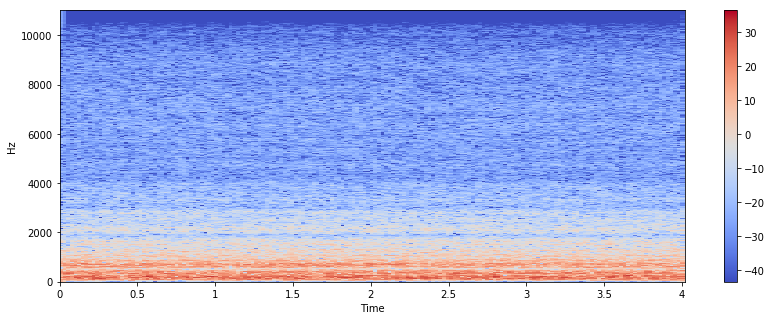

In [41]:
X=librosa.stft(data)
xdb=librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,5))
librosa.display.specshow(xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

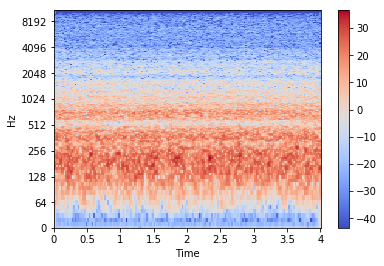

In [42]:
librosa.display.specshow(xdb, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar()

Okay now I am going to try using mel spectrograms as input to a Vanilla(not trained as yet) CNN and trained CNN(transfer learning). Let us play with a Vanilla CNN... <hr>
As you can see I play around a bit just to get a bit of insight of the data that I would pass through to the CNN

In [43]:
value=librosa.feature.melspectrogram(data, sr=sampling_rate)
len(value.shape)

2

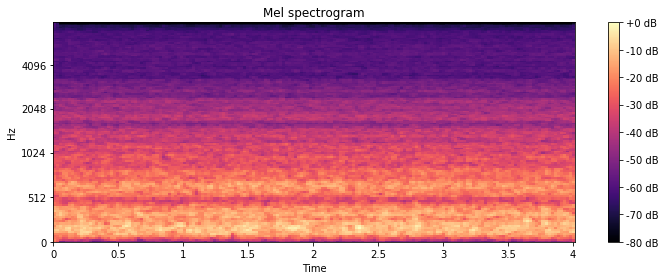

In [44]:
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(value, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [45]:
encoder=LabelEncoder()
y=encoder.fit_transform(audio_dataframe.Class)
audio_dataframe['Encoded_Classes']=y
audio_dataframe.head()

,ID,Class,Encoded_Classes
0,0,siren,8
1,1,street_music,9
2,2,drilling,4
3,3,siren,8
4,4,dog_bark,3


So I also want to get the hang of creating custom generators for Keras, but it does seem like one that requires a bit of practice

In [60]:
def create_spectrogram_data(input_files):
    mel_specs=[]
    for x in input_files:
        ideal_shape=np.zeros((128,173))
        loaded_data, sampling_rate=librosa.load(x)#we load in the audio files from the path
        mel_spec_of_data=librosa.feature.melspectrogram(loaded_data, sr=sampling_rate)#we then convert the loaded...
        #...data to a melspectrogram
        ideal_shape[:mel_spec_of_data.shape[0], :mel_spec_of_data.shape[1]]=mel_spec_of_data
        mel_specs.append(ideal_shape)#we append it to a list that we wish to return
    values=np.array(mel_specs)#we then convert the list to an array and return the result
    values=np.reshape(values, newshape=(-1,128,173,1))
    print(values.shape)
    return values

def generate_spectro_data(filenames,labels,batch_size=64):
    while True:
        batch_indices=np.random.randint(0, len(filenames), size=batch_size)
        mel_specs=create_spectrogram_data(filenames[batch_indices])
        label_values=np.array(labels[batch_indices])        
        yield (mel_specs, label_values)

def get_feature_and_label_names(dataframe):
    filenames=['Train/{}.wav'.format(x) for x in dataframe.ID]
    labels=dataframe.Encoded_Classes.values
    return filenames, labels

We must convert the dataframe into a stratified training and testing set so that we equally split the data

In [61]:
splitter=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

strata_train_set=[]
strata_test_set=[]

for train_index, test_index in splitter.split(audio_dataframe, audio_dataframe.Class):
    strata_train_set=audio_dataframe.loc[train_index]
    strata_test_set=audio_dataframe.loc[test_index]

In [62]:
strata_train_set.Class.value_counts()

jackhammer          534
engine_idling       499
siren               486
street_music        480
children_playing    480
drilling            480
dog_bark            480
air_conditioner     480
car_horn            245
gun_shot            184
Name: Class, dtype: int64

In [63]:
train_features, train_labels=get_feature_and_label_names(strata_train_set)
test_features, test_labels=get_feature_and_label_names(strata_test_set)

Below is where I take a random sample of the training_features just to see whether my methods generated data that the model would accept

In [64]:
testing=np.random.choice(train_features, size=15)
testing

array(['Train/5820.wav', 'Train/328.wav', 'Train/1119.wav',
       'Train/333.wav', 'Train/1246.wav', 'Train/5146.wav',
       'Train/4101.wav', 'Train/8678.wav', 'Train/2458.wav',
       'Train/1751.wav', 'Train/11.wav', 'Train/5715.wav',
       'Train/217.wav', 'Train/4029.wav', 'Train/3172.wav'], dtype='<U14')

In [65]:
test_specs=create_spectrogram_data(testing)

(15, 128, 173, 1)


In [66]:
train_labels

array([1, 3, 2, ..., 7, 5, 8])

In [67]:
train_labels=np.reshape(train_labels, newshape=(-1,1))
test_labels=np.reshape(test_labels, newshape=(-1,1))

In [68]:
one_hot_encode=OneHotEncoder()
hot_train_labels=one_hot_encode.fit_transform(train_labels)
hot_test_labels=one_hot_encode.transform(test_labels)

/home/stoic/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [69]:
train_generator=generate_spectro_data(np.array(train_features), hot_train_labels)
test_generator=generate_spectro_data(np.array(test_features), hot_test_labels)

I also see that we could have just used the next() function to generate a batch and see the shape of the data returned... Which is 64 samples of height 128, width 173 and depth 1

In [70]:
x,y=next(train_generator)

(64, 128, 173, 1)


In [89]:
print(x.shape)

(64, 128, 173, 1)


In [90]:
print(y.shape)

(64, 10)


We then create a very basic CNN and attempt to train it

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(128, 173,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NameError: name 'Sequential' is not defined

When creating a custom generator we need the amount of steps for the training set and validation set, which is just the size of each dataset divided by the batch size

In [71]:
train_steps=len(train_labels)//64
valid_steps=len(test_labels)//64

After breaking many times, I got the model to run, but it still is not perfect, if there is anyone who recommends me try different steps, I would appreciate it!

In [ ]:
history=model.fit_generator(generator=train_generator,validation_data=test_generator,epochs=20, steps_per_epoch=train_steps, validation_steps=valid_steps)

Epoch 1/20
(64, 128, 173, 1)
66/67 [============================>.] - ETA: 30s - loss: 6.7699 - acc: 0.3385 (64, 128, 173, 1)
(64, 128, 173, 1)
(64, 128, 173, 1)


<h1>What Did I Learn With This Project: </h1>
<ul>
    <li>Audio Processing, like any other project, is all about getting the data in a format that the model can understand and optimally utilize to make accurate predictions!</li>
    <li>Librosa is an amazing library that works extremely well with Audio Processing Tasks!</li>
    <li>Using Tutorials I was able to display my first spectrogram ever! Not bad!</li>
    <li>I did learn how to better create a custom keras generator, which I still am perfecting!</li>
    <li>I did demystify another topic(Signal Processing) and have better knowledge of working with projects in this domain(My overall experience with Artificial Intelligence Projects have been augmented!)</li>


    


</ul>

<h1>References</h1>

<ol>
    <li>https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8</li>
    <li><a href='https://www.kaggle.com/pavansanagapati/urban-sound-classification'>Click Here For The Kaggle Dataset Page</a></li>
    <li>Learned a lot from this dude: https://towardsdatascience.com/urban-sound-classification-part-1-99137c6335f9</li>
    <li>https://www.analyticsvidhya.com/blog/2017/08/audio-voice-processing-deep-learning/</li>
    <li>https://medium.com/@krishna_84429/audio-classification-using-transfer-learning-approach-912e6f7397bb</li>
    <li>https://towardsdatascience.com/automatic-speaker-recognition-using-transfer-learning-6fab63e34e74</li>
    <li>https://colab.research.google.com/github/zaidalyafeai/Notebooks/blob/master/Custom_Data_Generator_in_Keras.ipynb#scrollTo=Q8DPhBG8dPrn</li>
</ol>